In [1]:
%pylab
%matplotlib inline
%load_ext watermark
%watermark -v -m -p scipy,sklearn,numpy


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
CPython 3.5.2
IPython 6.0.0

scipy 0.17.0
sklearn 0.17
numpy 1.11.0

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.4.0-79-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [3]:
print(diabetes.target[:10])

[ 151.   75.  141.  206.  135.   97.  138.   63.  110.  310.]


In [4]:
print(diabetes.data[:5])

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]


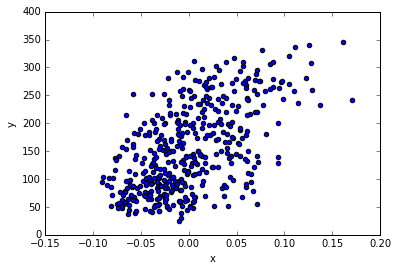

In [5]:
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')

In [6]:
nl = numpy.array([2.0]*207+[1.0]*235)
norm = (nl - np.mean(nl))/np.var(nl)
norm2 = norm / np.sqrt(np.sum(np.square(norm)))
norm2[0], norm2[300]

(0.050680118739818564, -0.044641636506989109)

In [7]:
from sklearn import preprocessing
norm2 = preprocessing.normalize(preprocessing.scale(nl).reshape(1,-1), norm='l2')
norm2[0, 0], norm2[0, 300]

(0.050680118739818501, -0.044641636506989053)

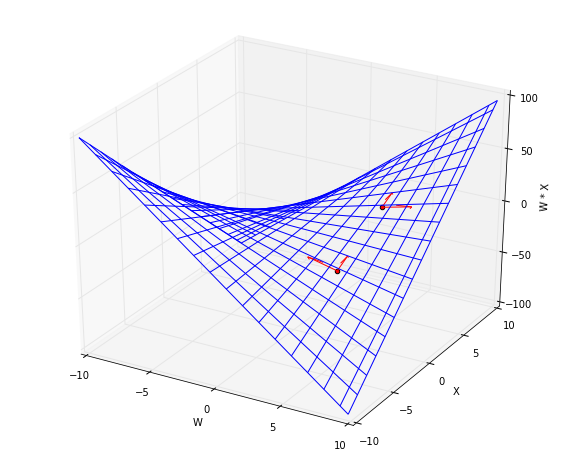

In [8]:
from mpl_toolkits.mplot3d import axes3d
x = np.arange(-10., 10., 0.2)
y = np.arange(-10., 10., 0.2)
x = x.reshape(len(x), 1)
z = x * y

pylab.rcParams['figure.figsize'] = (10, 8)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, rstride=6, cstride=6)
ax.scatter([5], [3], [15], c='r')
ax.quiver([5, 5], [3, 3], [15, 15], [1, 0], [0, 1], [3, 5],
         length=7, color='red', pivot='tail')
ax.scatter([5], [-3], [-15], c='r')
ax.quiver([5, 5], [-3, -3], [-15, -15], [-1, 0], [0, 1], [3, 5],
         length=7, color='red', pivot='tail')
ax.set_xlabel('W')
ax.set_ylabel('X')
ax.set_zlabel('W * X')
plt.gca().set_xlim([-10, 10])
plt.gca().set_ylim([-10, 10])
plt.gca().set_zlim([-100, 100])
plt.show()

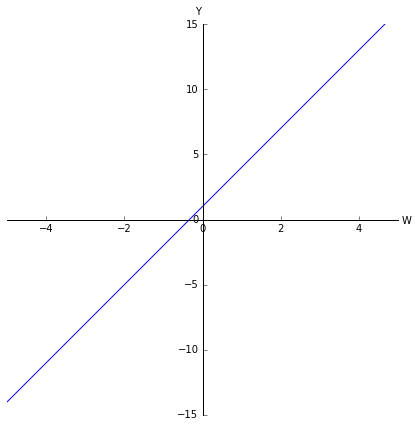

In [9]:
w = np.arange(-5., 5., 0.2)
y = 3*w + 1

pylab.rcParams["figure.figsize"] = (7, 7)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.annotate('W', xy=(1.01, 0.51), ha='left', va='top', xycoords='axes fraction', 
            fontsize=10)
ax.annotate('Y', xy=(0.52, 1.04), xytext=(-15,2), ha='left', va='top', xycoords='axes' 
            ' fraction', textcoords='offset points', fontsize=10)

plt.plot(w, y)
plt.gca().set_xlim([-5, 5])
plt.gca().set_ylim([-15, 15])
plt.show()

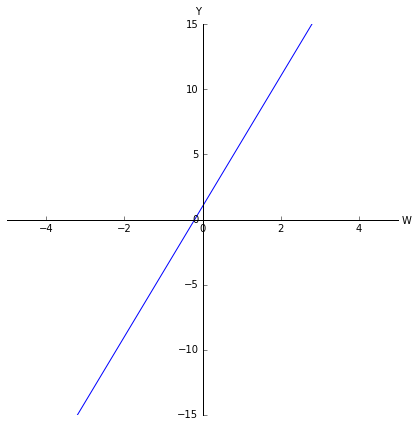

In [10]:
w = np.arange(-5., 5., 0.2)
y = 5*w + 1

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.annotate('W', xy=(1.01, 0.51), ha='left', va='top', xycoords='axes fraction', 
            fontsize=10)
ax.annotate('Y', xy=(0.52, 1.04), xytext=(-15,2), ha='left', va='top', xycoords='axes' 
            ' fraction', textcoords='offset points', fontsize=10)

plt.plot(w, y)
plt.gca().set_xlim([-5, 5])
plt.gca().set_ylim([-15, 15])
plt.show()

In [11]:
class SingleNeuron(object):
    def __init__(self):
        self._w = 0    # 가중치 w
        self._b = 0    # 바이어스 b
        self._x = 0    # 입력값 x
        
    def set_params(self, w, b):
        """가중치와 바이어스를 저장합니다."""
        self._w = w
        self._b = b
        
    def forpass(self, x):
        """정방향 수식 w * x + b 를 계산하고 결과를 리턴합니다."""
        self._x = x
        _y_hat = self._w * self._x + self._b
        return _y_hat
    
    def backprop(self, err):
        """에러를 입력받아 가중치와 바이어스의 변화율을 곱하고 평균을 낸 후 감쇠된 변경량을 저장합니다."""
        m = len(self._x)
        self._w_grad = 0.1 * np.sum(err * self._x) / m
        self._b_grad = 0.1 * np.sum(err * 1) / m
        
    def update_grad(self):
        """계산된 파라메터의 변경량을 업데이트하여 새로운 파라메타를 셋팅합니다."""
        self.set_params(self._w + self._w_grad, self._b + self._b_grad)

In [12]:
n1 = SingleNeuron()
n1.set_params(5, 1) # w, b 를 5, 1 로 셋팅
print(n1.forpass(3)) # x 에 3 을 입력

16


In [13]:
n1.set_params(6, 1) # w, b 를 6, 1 로 셋팅
print(n1.forpass(3)) # x 에 3 을 입력

19


In [14]:
n1.set_params(5, 1) # w, b 를 5, 1 로 셋팅
print(n1.forpass(4)) # x 에 4 을 입력

21


In [15]:
n1.set_params(5, 2) # w, b 를 5, 2 로 셋팅
print(n1.forpass(3)) # x 에 3 을 입력

17


In [16]:
n1.set_params(5, 0) # w, b 를 5, 0 으로 셋팅
print(n1.forpass(3)) # x 에 4 을 입력

15


In [17]:
n1.set_params(5, 1)
for i in range(30000):
    y_hat = n1.forpass(diabetes.data[:,2])
    error = diabetes.target - y_hat
    n1.backprop(error)
    n1.update_grad()
print('Final W', n1._w)
print('Final b', n1._b)

Final W 948.370777729
Final b 152.133484163


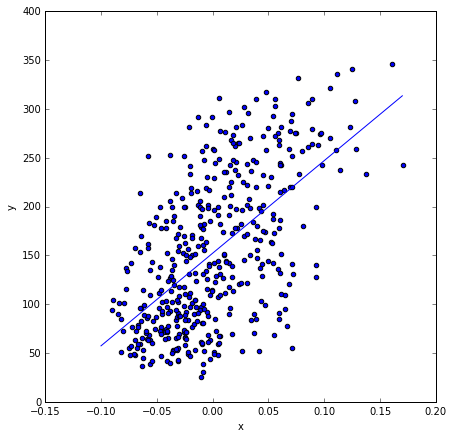

In [18]:
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.plot([-0.10, 0.17], [n1._w*-0.10+n1._b, n1._w*0.17+n1._b], 'b-')

In [19]:
from sklearn import linear_model

sgd_regr = linear_model.SGDRegressor(n_iter=30000, penalty='none')
sgd_regr.fit(diabetes.data[:,2].reshape(-1,1), diabetes.target)
print(diabetes.data[:,2][:10])

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469 -0.04069594
 -0.04716281 -0.00189471  0.06169621  0.03906215]


In [20]:
print(diabetes.data[:,2][:10].reshape(-1,1))

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]]


In [21]:
print('Coefficients: ', sgd_regr.coef_, sgd_regr.intercept_)

Coefficients:  [ 948.18354639] [ 152.12642505]


In [22]:
sgd_regr = linear_model.LinearRegression()
sgd_regr.fit(np.vstack(diabetes.data[:,2]), diabetes.target)
print('Coefficients: ', sgd_regr.coef_, sgd_regr.intercept_)

Coefficients:  [ 949.43526038] 152.133484163
